In [ ]:
import numpy as np
import pandas as pd
import tensorflow 
import keras
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Input, Dense, MaxPool2D, Conv2D, BatchNormalization, Dropout 
from sklearn.metrics import confusion_matrix
%pip install visualkeras
import visualkeras
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

path = '/content/drive/My Drive/'

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/digit recognation/train.csv")
test = pd.read_csv("/content/drive/MyDrive/digit recognation/test.csv")
train.shape,test.shape

((42000, 785), (28000, 784))

In [ ]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
# Split to X,y
X_train = train.drop(['label'],axis=1)
y_train = train['label']
X_train.shape, y_train.shape, test.shape

((42000, 784), (42000,), (28000, 784))

In [ ]:
# Turning the images to 8-bit images
X_train = X_train / 255.0    
X_test = test / 255.0

In [ ]:
# Split the data into train and validation 

X_train,X_val,y_train, y_val = train_test_split(X_train, y_train, train_size = 0.80, random_state = 42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (33600, 784)
y_train shape: (33600,)
X_val shape: (8400, 784)
y_val shape: (8400,)


In [ ]:
X_train_reshaped = X_train.values.reshape(-1, 28, 28) # just to visualize
# Note : purpose of "values" attribute is to convert the DF object X_train into a NumPy array
X_train_reshaped.shape

(33600, 28, 28)

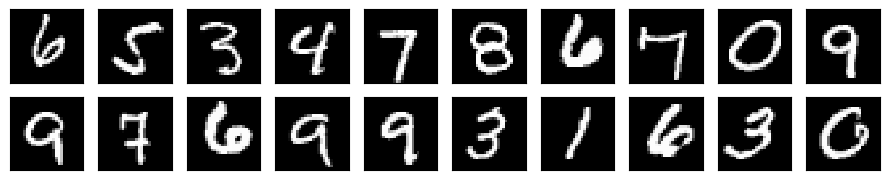

In [ ]:
plt.figure(figsize=(9,2))
for i in range(10):
    for j in range(2):
        ax = plt.subplot(2, 10, 10*j+i+1)
        plt.imshow(X_train_reshaped[j*10+i,:,:], interpolation="nearest", 
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

In [ ]:
## Tensorflow requires categorical data to be encoded by OHE
yy_train = to_categorical(y_train, num_classes=10)
yy_val = to_categorical(y_val, num_classes=10)
print(yy_train.shape, y_val.shape)
print(X_train.shape,X_val.shape)

(33600, 10) (8400,)
(33600, 784) (8400, 784)


In [ ]:
# Again reshaping each example to a vector to work with the NN
X = X_train_reshaped.reshape(-1,28*28)
Xt = X_val.values.reshape(-1,28*28)

X.shape, Xt.shape

((33600, 784), (8400, 784))

In [ ]:
input = Input(shape=X[0].size)
x = Dense(1024,activation ='relu')(input)
x  = Dropout(0.5)(x)
x  = Dense(256, activation='relu')(x)
x  = Dropout(0.5)(x)
x  = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(input, output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290

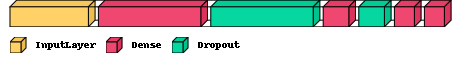

In [ ]:
visualkeras.layered_view(model,legend=True)

In [ ]:
history = model.fit(epochs=20, x=X ,y=yy_train, validation_data=(Xt, yy_val), batch_size=64)

Epoch 1/20
525/525 [==============================] - 20s 35ms/step - loss: 0.4213 - accuracy: 0.8668 - val_loss: 0.1558 - val_accuracy: 0.9510
Epoch 2/20
525/525 [==============================] - 16s 30ms/step - loss: 0.1960 - accuracy: 0.9405 - val_loss: 0.1353 - val_accuracy: 0.9599
Epoch 3/20
525/525 [==============================] - 15s 28ms/step - loss: 0.1546 - accuracy: 0.9530 - val_loss: 0.1119 - val_accuracy: 0.9652
Epoch 4/20
525/525 [==============================] - 14s 26ms/step - loss: 0.1326 - accuracy: 0.9599 - val_loss: 0.1176 - val_accuracy: 0.9642
Epoch 5/20
525/525 [==============================] - 14s 27ms/step - loss: 0.1167 - accuracy: 0.9643 - val_loss: 0.1059 - val_accuracy: 0.9687
Epoch 6/20
525/525 [==============================] - 15s 29ms/step - loss: 0.1064 - accuracy: 0.9687 - val_loss: 0.0991 - val_accuracy: 0.9696
Epoch 7/20
525/525 [==============================] - 14s 27ms/step - loss: 0.0947 - accuracy: 0.9706 - val_loss: 0.0899 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

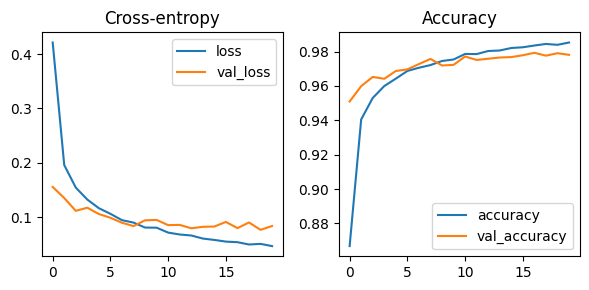

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(ax=axes[0],title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(ax=axes[1],title="Accuracy")
plt.tight_layout()
plt.show

In [ ]:
score = model.evaluate(Xt, yy_val)
print(score)  
yyy = model.predict(Xt)
from sklearn.metrics import confusion_matrix
ystim = np.argmax(yyy,axis=1)
yy = y_val.astype(int)
print('\n Confusion matrix')
print(confusion_matrix(yy,ystim))

263/263 [==============================] - 1s 5ms/step - loss: 0.0840 - accuracy: 0.9781
[0.08397690206766129, 0.9780952334403992]
263/263 [==============================] - 1s 4ms/step

 Confusion matrix
[[805   0   2   2   0   0   3   2   1   1]
 [  0 904   1   0   1   0   1   0   2   0]
 [  2   9 820   2   6   0   0   0   6   1]
 [  1   0   3 915   0   4   0   2   7   5]
 [  1   0   1   0 823   1   5   2   0   6]
 [  1   0   0  13   0 675   7   1   2   3]
 [  3   1   0   0   1   2 775   0   3   0]
 [  1   4   7   1   2   0   0 864   3  11]
 [  0   4   2   2   2   2   1   1 820   1]
 [  0   0   1   5   8   2   0   5   2 815]]


In [ ]:
yyy123 = model.predict(test)
ImageId = []
Label = []
for i in range(len(yyy123)):
    ImageId.append(i+1)
    Label.append(yyy123[i].argmax())
    
submissions=pd.DataFrame({"ImageId": ImageId,
                         "Label": Label})
submissions.to_csv("submission.csv", index=False, header=True)

875/875 [==============================] - 5s 6ms/step


In [ ]:
data= pd.read_csv("submission.csv")
data


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
path= '/content/drive/MyDrive/digit recognation/submission.csv'

with open(path, 'w' , encoding = 'utf-8-sig') as f:data.to_csv(f)